# 📥 Import Libraries & Dataset

In [562]:
# %pip install pandas
# %pip install numpy
# %pip install scikit-learn==1.5.2
# %pip install xgboost
# %pip install catboost

## 📦 Libraries

In [563]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA
import networkx as nx
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer

## 🗃️ Dataset

In [564]:
# Import dataset
url = "https://drive.google.com/uc?id=1wnDUJCke0araT3A7SAk8ZLTIbV00R3ev"
df = pd.read_csv(url)

# 📰 Description

## 📍 Shape

In [565]:
print("Jumlah baris: ", df.shape[0])
print("Jumlah kolom: ", df.shape[1])

Jumlah baris:  8000
Jumlah kolom:  21


## 📍 Structure

In [566]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     8000 non-null   object 
 1   VendorID               8000 non-null   float64
 2   lpep_pickup_datetime   8000 non-null   object 
 3   lpep_dropoff_datetime  8000 non-null   object 
 4   store_and_fwd_flag     8000 non-null   object 
 5   RatecodeID             8000 non-null   float64
 6   PULocationID           8000 non-null   int64  
 7   DOLocationID           8000 non-null   int64  
 8   passenger_count        8000 non-null   float64
 9   trip_distance          8000 non-null   float64
 10  fare_amount            8000 non-null   float64
 11  extra                  8000 non-null   float64
 12  mta_tax                8000 non-null   float64
 13  tip_amount             8000 non-null   float64
 14  tolls_amount           8000 non-null   float64
 15  ehai

## 📍 Columns

In [567]:
df.columns

Index(['ID', 'VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'trip_type', 'congestion_surcharge', 'payment_type'],
      dtype='object')

Berikut ini adalah deskripsi kolom pada dataset:
- **VendorID**: Kode yang menunjukkan penyedia TPEP yang menyediakan catatan.
  - *1 = Creative Mobile Technologies, LLC*
  - *2 = VeriFone Inc*
- **lpep_pickup_datetime**: Tanggal dan waktu ketika meteran dinyalakan.
- **lpep_dropoff_datetime**: Tanggal dan waktu ketika meteran dimatikan.
- **store_and_fwd_flag**: Flag yang menunjukkan apakah catatan perjalanan disimpan dalam memori kendaraan sebelum dikirim ke vendor.
  - *Y = perjalanan yang disimpan dan diteruskan*
  - *N = perjalanan yang tidak disimpan dan diteruskan*
- **RatecodeID**: Kode tarif akhir yang berlaku pada akhir perjalanan.
  - *1 = Tarif standar*
  - *2 = JFK*
  - *3 = Newark*
  - *4 = Nassau atau Westchester*
  - *5 = Tarif negosiasi*
  - *6 = Perjalanan grup*
- **PULocationID**: Zona Taksi TLC di mana meteran dinyalakan.
- **DOLocationID**: Zona Taksi TLC di mana meteran dimatikan.
- **passenger_count**: Jumlah penumpang di kendaraan. Ini adalah nilai yang dimasukkan oleh sopir.
- **trip_distance**: Jarak perjalanan yang telah dilalui dalam mil yang dilaporkan oleh meteran.
- **fare_amount**: Biaya waktu dan jarak yang dihitung oleh meteran.
- **extra**: Biaya tambahan dan surcharge (misalnya, biaya tambahan $0,50 dan $1 untuk jam sibuk dan malam hari).
- **mta_tax**: Pajak MTA sebesar 0,50 dolar yang otomatis dikenakan berdasarkan tarif meteran yang digunakan.
- **tip_amount**: Jumlah tip field ini otomatis terisi untuk tip kartu kredit. Tip tunai tidak termasuk.
- **tolls_amount**: Jumlah total semua tol yang dibayar selama perjalanan.
- **improvement_surcharge**: Biaya perbaikan sebesar $0,30 yang dikenakan pada awal perjalanan. Biaya ini mulai diterapkan pada tahun 2015.
- **total_amount**: Jumlah total yang dibebankan kepada penumpang (tidak termasuk tip tunai).
- **payment_type**: Kode numerik yang menunjukkan bagaimana penumpang membayar perjalanan.
  - *1 = Kartu kredit*
  - *2 = Tunai*
- **trip_type**: Jenis perjalanan.
  - *1 = Inner city*
  - *2 = Outer city*
- **congestion_surcharge**: Jumlah total yang dikumpulkan untuk surcharge kemacetan NYC selama perjalanan.

## 📍 Overview

In [568]:
df.head()

,ID,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,trip_type,congestion_surcharge,payment_type
0,T03315,2.0,2021-07-02 17:19:11,2021-07-02 17:40:02,N,1.0,152,142,1.0,4.30,...,1.0,0.5,5.00,0.00,NaN,0.3,27.55,1.0,2.75,1.0
1,T07720,2.0,2021-07-05 22:48:04,2021-07-05 23:12:02,N,1.0,93,107,2.0,13.52,...,0.5,0.5,12.15,6.55,NaN,0.3,60.75,1.0,2.75,1.0
2,T09695,2.0,2021-07-07 06:29:43,2021-07-07 06:38:42,N,1.0,74,75,1.0,1.55,...,0.0,0.5,0.00,0.00,NaN,0.3,8.80,1.0,0.00,2.0
3,T08802,2.0,2021-07-06 15:33:29,2021-07-06 15:43:25,N,1.0,226,129,1.0,1.22,...,0.0,0.5,0.00,0.00,NaN,0.3,8.80,1.0,0.00,2.0
4,T01413,2.0,2021-07-01 17:09:07,2021-07-01 18:03:12,N,1.0,55,86,1.0,14.23,...,1.0,0.5,0.00,2.45,NaN,0.3,49.75,1.0,0.00,1.0


In [569]:
df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,trip_type,congestion_surcharge,payment_type
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,0.0,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,1.833250,1.176375,98.700125,134.694875,1.270125,3.459532,14.995941,0.330781,0.475875,1.277159,0.351390,NaN,0.296887,18.237415,1.037875,0.599500,1.427625
std,0.372776,0.813541,64.792549,77.750038,0.917885,4.601964,14.543702,0.626111,0.113664,2.476832,1.503395,NaN,0.038558,16.126335,0.190906,1.136344,0.517972
min,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,-25.000000,-1.000000,-0.500000,-1.140000,0.000000,NaN,-0.300000,-28.550000,1.000000,-2.750000,1.000000
25%,2.000000,1.000000,55.000000,74.000000,1.000000,1.030000,7.000000,0.000000,0.500000,0.000000,0.000000,NaN,0.300000,8.800000,1.000000,0.000000,1.000000
50%,2.000000,1.000000,75.000000,135.000000,1.000000,1.930000,10.200000,0.000000,0.500000,0.000000,0.000000,NaN,0.300000,13.300000,1.000000,0.000000,1.000000
75%,2.000000,1.000000,129.000000,212.000000,1.000000,3.790000,16.500000,0.500000,0.500000,2.040000,0.000000,NaN,0.300000,20.800000,1.000000,0.000000,2.000000
max,2.000000,5.000000,265.000000,265.000000,6.000000,37.600000,156.000000,4.500000,0.500000,47.880000,13.750000,NaN,0.300000,207.480000,2.000000,2.750000,4.000000


# 🛠️ Data Pre-Processing

## 📍 Duplicate Data

In [570]:
# Cek duplikat data
print("Jumlah duplikasi data: ", df.duplicated().sum())

Jumlah duplikasi data:  0


## 📍 Missing Values

In [571]:
# Threshold
MISSING_THRESHOLD = df.shape[0] * 0.5

missing_counts = df.isna().sum().sort_values(ascending=False)
present_counts = df.notna().sum()
missing_percentage = (missing_counts / df.shape[0] * 100).round(2)

missing_data_summary = pd.DataFrame({
    'Missing Values': missing_counts,
    'Present Values': present_counts,
    'Missing Percent': missing_percentage
})

missing_data_summary[missing_data_summary['Missing Values'] > MISSING_THRESHOLD]

,Missing Values,Present Values,Missing Percent
ehail_fee,8000,0,100.0


In [572]:
# Drop ehail_fee
df = df.drop(columns=['ehail_fee'], axis=1)

In [573]:
# Drop payment_type diluar 1, 2
df = df[df['payment_type'].isin([1, 2])]

In [574]:
df.head()

,ID,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_type,congestion_surcharge,payment_type
0,T03315,2.0,2021-07-02 17:19:11,2021-07-02 17:40:02,N,1.0,152,142,1.0,4.30,18.0,1.0,0.5,5.00,0.00,0.3,27.55,1.0,2.75,1.0
1,T07720,2.0,2021-07-05 22:48:04,2021-07-05 23:12:02,N,1.0,93,107,2.0,13.52,38.0,0.5,0.5,12.15,6.55,0.3,60.75,1.0,2.75,1.0
2,T09695,2.0,2021-07-07 06:29:43,2021-07-07 06:38:42,N,1.0,74,75,1.0,1.55,8.0,0.0,0.5,0.00,0.00,0.3,8.80,1.0,0.00,2.0
3,T08802,2.0,2021-07-06 15:33:29,2021-07-06 15:43:25,N,1.0,226,129,1.0,1.22,8.0,0.0,0.5,0.00,0.00,0.3,8.80,1.0,0.00,2.0
4,T01413,2.0,2021-07-01 17:09:07,2021-07-01 18:03:12,N,1.0,55,86,1.0,14.23,45.5,1.0,0.5,0.00,2.45,0.3,49.75,1.0,0.00,1.0


# 🛠️ Clustering

## 📍 Encoding

In [575]:
# Encoding store_and_fwd_flag
label_encoder = LabelEncoder()

df["store_and_fwd_flag"] = label_encoder.fit_transform(df["store_and_fwd_flag"])

In [576]:
df

,ID,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_type,congestion_surcharge,payment_type
0,T03315,2.0,2021-07-02 17:19:11,2021-07-02 17:40:02,0,1.0,152,142,1.0,4.30,18.0,1.00,0.5,5.00,0.00,0.3,27.55,1.0,2.75,1.0
1,T07720,2.0,2021-07-05 22:48:04,2021-07-05 23:12:02,0,1.0,93,107,2.0,13.52,38.0,0.50,0.5,12.15,6.55,0.3,60.75,1.0,2.75,1.0
2,T09695,2.0,2021-07-07 06:29:43,2021-07-07 06:38:42,0,1.0,74,75,1.0,1.55,8.0,0.00,0.5,0.00,0.00,0.3,8.80,1.0,0.00,2.0
3,T08802,2.0,2021-07-06 15:33:29,2021-07-06 15:43:25,0,1.0,226,129,1.0,1.22,8.0,0.00,0.5,0.00,0.00,0.3,8.80,1.0,0.00,2.0
4,T01413,2.0,2021-07-01 17:09:07,2021-07-01 18:03:12,0,1.0,55,86,1.0,14.23,45.5,1.00,0.5,0.00,2.45,0.3,49.75,1.0,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,T01462,1.0,2021-07-01 18:53:04,2021-07-01 18:58:56,0,1.0,75,74,1.0,1.40,6.5,1.00,0.5,1.65,0.00,0.3,9.95,1.0,0.00,1.0
7996,T06004,1.0,2021-07-04 16:58:33,2021-07-04 17:16:33,0,1.0,74,164,2.0,4.50,16.5,2.75,0.5,0.00,0.00,0.3,20.05,1.0,2.75,2.0
7997,T05528,2.0,2021-07-04 09:54:34,2021-07-04 09:58:27,0,1.0,41,42,1.0,0.77,5.0,0.00,0.5,0.00,0.00,0.3,5.80,1.0,0.00,2.0
7998,T05880,2.0,2021-07-04 14:31:00,2021-07-04 14:48:49,0,1.0,244,233,1.0,8.39,25.0,0.00,0.5,8.56,0.00,0.3,37.11,1.0,2.75,1.0


In [577]:
# Convert datetime
df['pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

In [578]:
df

,ID,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_type,congestion_surcharge,payment_type,pickup_datetime,dropoff_datetime
0,T03315,2.0,2021-07-02 17:19:11,2021-07-02 17:40:02,0,1.0,152,142,1.0,4.30,...,0.5,5.00,0.00,0.3,27.55,1.0,2.75,1.0,2021-07-02 17:19:11,2021-07-02 17:40:02
1,T07720,2.0,2021-07-05 22:48:04,2021-07-05 23:12:02,0,1.0,93,107,2.0,13.52,...,0.5,12.15,6.55,0.3,60.75,1.0,2.75,1.0,2021-07-05 22:48:04,2021-07-05 23:12:02
2,T09695,2.0,2021-07-07 06:29:43,2021-07-07 06:38:42,0,1.0,74,75,1.0,1.55,...,0.5,0.00,0.00,0.3,8.80,1.0,0.00,2.0,2021-07-07 06:29:43,2021-07-07 06:38:42
3,T08802,2.0,2021-07-06 15:33:29,2021-07-06 15:43:25,0,1.0,226,129,1.0,1.22,...,0.5,0.00,0.00,0.3,8.80,1.0,0.00,2.0,2021-07-06 15:33:29,2021-07-06 15:43:25
4,T01413,2.0,2021-07-01 17:09:07,2021-07-01 18:03:12,0,1.0,55,86,1.0,14.23,...,0.5,0.00,2.45,0.3,49.75,1.0,0.00,1.0,2021-07-01 17:09:07,2021-07-01 18:03:12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,T01462,1.0,2021-07-01 18:53:04,2021-07-01 18:58:56,0,1.0,75,74,1.0,1.40,...,0.5,1.65,0.00,0.3,9.95,1.0,0.00,1.0,2021-07-01 18:53:04,2021-07-01 18:58:56
7996,T06004,1.0,2021-07-04 16:58:33,2021-07-04 17:16:33,0,1.0,74,164,2.0,4.50,...,0.5,0.00,0.00,0.3,20.05,1.0,2.75,2.0,2021-07-04 16:58:33,2021-07-04 17:16:33
7997,T05528,2.0,2021-07-04 09:54:34,2021-07-04 09:58:27,0,1.0,41,42,1.0,0.77,...,0.5,0.00,0.00,0.3,5.80,1.0,0.00,2.0,2021-07-04 09:54:34,2021-07-04 09:58:27
7998,T05880,2.0,2021-07-04 14:31:00,2021-07-04 14:48:49,0,1.0,244,233,1.0,8.39,...,0.5,8.56,0.00,0.3,37.11,1.0,2.75,1.0,2021-07-04 14:31:00,2021-07-04 14:48:49


In [579]:
# Extract time-based features
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day'] = df['pickup_datetime'].dt.dayofweek
df['pickup_month'] = df['pickup_datetime'].dt.month
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
df['dropoff_day'] = df['dropoff_datetime'].dt.dayofweek
df['dropoff_month'] = df['dropoff_datetime'].dt.month

In [580]:
df

,ID,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,congestion_surcharge,payment_type,pickup_datetime,dropoff_datetime,pickup_hour,pickup_day,pickup_month,dropoff_hour,dropoff_day,dropoff_month
0,T03315,2.0,2021-07-02 17:19:11,2021-07-02 17:40:02,0,1.0,152,142,1.0,4.30,...,2.75,1.0,2021-07-02 17:19:11,2021-07-02 17:40:02,17,4,7,17,4,7
1,T07720,2.0,2021-07-05 22:48:04,2021-07-05 23:12:02,0,1.0,93,107,2.0,13.52,...,2.75,1.0,2021-07-05 22:48:04,2021-07-05 23:12:02,22,0,7,23,0,7
2,T09695,2.0,2021-07-07 06:29:43,2021-07-07 06:38:42,0,1.0,74,75,1.0,1.55,...,0.00,2.0,2021-07-07 06:29:43,2021-07-07 06:38:42,6,2,7,6,2,7
3,T08802,2.0,2021-07-06 15:33:29,2021-07-06 15:43:25,0,1.0,226,129,1.0,1.22,...,0.00,2.0,2021-07-06 15:33:29,2021-07-06 15:43:25,15,1,7,15,1,7
4,T01413,2.0,2021-07-01 17:09:07,2021-07-01 18:03:12,0,1.0,55,86,1.0,14.23,...,0.00,1.0,2021-07-01 17:09:07,2021-07-01 18:03:12,17,3,7,18,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,T01462,1.0,2021-07-01 18:53:04,2021-07-01 18:58:56,0,1.0,75,74,1.0,1.40,...,0.00,1.0,2021-07-01 18:53:04,2021-07-01 18:58:56,18,3,7,18,3,7
7996,T06004,1.0,2021-07-04 16:58:33,2021-07-04 17:16:33,0,1.0,74,164,2.0,4.50,...,2.75,2.0,2021-07-04 16:58:33,2021-07-04 17:16:33,16,6,7,17,6,7
7997,T05528,2.0,2021-07-04 09:54:34,2021-07-04 09:58:27,0,1.0,41,42,1.0,0.77,...,0.00,2.0,2021-07-04 09:54:34,2021-07-04 09:58:27,9,6,7,9,6,7
7998,T05880,2.0,2021-07-04 14:31:00,2021-07-04 14:48:49,0,1.0,244,233,1.0,8.39,...,2.75,1.0,2021-07-04 14:31:00,2021-07-04 14:48:49,14,6,7,14,6,7


In [581]:
df

,ID,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,congestion_surcharge,payment_type,pickup_datetime,dropoff_datetime,pickup_hour,pickup_day,pickup_month,dropoff_hour,dropoff_day,dropoff_month
0,T03315,2.0,2021-07-02 17:19:11,2021-07-02 17:40:02,0,1.0,152,142,1.0,4.30,...,2.75,1.0,2021-07-02 17:19:11,2021-07-02 17:40:02,17,4,7,17,4,7
1,T07720,2.0,2021-07-05 22:48:04,2021-07-05 23:12:02,0,1.0,93,107,2.0,13.52,...,2.75,1.0,2021-07-05 22:48:04,2021-07-05 23:12:02,22,0,7,23,0,7
2,T09695,2.0,2021-07-07 06:29:43,2021-07-07 06:38:42,0,1.0,74,75,1.0,1.55,...,0.00,2.0,2021-07-07 06:29:43,2021-07-07 06:38:42,6,2,7,6,2,7
3,T08802,2.0,2021-07-06 15:33:29,2021-07-06 15:43:25,0,1.0,226,129,1.0,1.22,...,0.00,2.0,2021-07-06 15:33:29,2021-07-06 15:43:25,15,1,7,15,1,7
4,T01413,2.0,2021-07-01 17:09:07,2021-07-01 18:03:12,0,1.0,55,86,1.0,14.23,...,0.00,1.0,2021-07-01 17:09:07,2021-07-01 18:03:12,17,3,7,18,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,T01462,1.0,2021-07-01 18:53:04,2021-07-01 18:58:56,0,1.0,75,74,1.0,1.40,...,0.00,1.0,2021-07-01 18:53:04,2021-07-01 18:58:56,18,3,7,18,3,7
7996,T06004,1.0,2021-07-04 16:58:33,2021-07-04 17:16:33,0,1.0,74,164,2.0,4.50,...,2.75,2.0,2021-07-04 16:58:33,2021-07-04 17:16:33,16,6,7,17,6,7
7997,T05528,2.0,2021-07-04 09:54:34,2021-07-04 09:58:27,0,1.0,41,42,1.0,0.77,...,0.00,2.0,2021-07-04 09:54:34,2021-07-04 09:58:27,9,6,7,9,6,7
7998,T05880,2.0,2021-07-04 14:31:00,2021-07-04 14:48:49,0,1.0,244,233,1.0,8.39,...,2.75,1.0,2021-07-04 14:31:00,2021-07-04 14:48:49,14,6,7,14,6,7


In [582]:
df

,ID,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,congestion_surcharge,payment_type,pickup_datetime,dropoff_datetime,pickup_hour,pickup_day,pickup_month,dropoff_hour,dropoff_day,dropoff_month
0,T03315,2.0,2021-07-02 17:19:11,2021-07-02 17:40:02,0,1.0,152,142,1.0,4.30,...,2.75,1.0,2021-07-02 17:19:11,2021-07-02 17:40:02,17,4,7,17,4,7
1,T07720,2.0,2021-07-05 22:48:04,2021-07-05 23:12:02,0,1.0,93,107,2.0,13.52,...,2.75,1.0,2021-07-05 22:48:04,2021-07-05 23:12:02,22,0,7,23,0,7
2,T09695,2.0,2021-07-07 06:29:43,2021-07-07 06:38:42,0,1.0,74,75,1.0,1.55,...,0.00,2.0,2021-07-07 06:29:43,2021-07-07 06:38:42,6,2,7,6,2,7
3,T08802,2.0,2021-07-06 15:33:29,2021-07-06 15:43:25,0,1.0,226,129,1.0,1.22,...,0.00,2.0,2021-07-06 15:33:29,2021-07-06 15:43:25,15,1,7,15,1,7
4,T01413,2.0,2021-07-01 17:09:07,2021-07-01 18:03:12,0,1.0,55,86,1.0,14.23,...,0.00,1.0,2021-07-01 17:09:07,2021-07-01 18:03:12,17,3,7,18,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,T01462,1.0,2021-07-01 18:53:04,2021-07-01 18:58:56,0,1.0,75,74,1.0,1.40,...,0.00,1.0,2021-07-01 18:53:04,2021-07-01 18:58:56,18,3,7,18,3,7
7996,T06004,1.0,2021-07-04 16:58:33,2021-07-04 17:16:33,0,1.0,74,164,2.0,4.50,...,2.75,2.0,2021-07-04 16:58:33,2021-07-04 17:16:33,16,6,7,17,6,7
7997,T05528,2.0,2021-07-04 09:54:34,2021-07-04 09:58:27,0,1.0,41,42,1.0,0.77,...,0.00,2.0,2021-07-04 09:54:34,2021-07-04 09:58:27,9,6,7,9,6,7
7998,T05880,2.0,2021-07-04 14:31:00,2021-07-04 14:48:49,0,1.0,244,233,1.0,8.39,...,2.75,1.0,2021-07-04 14:31:00,2021-07-04 14:48:49,14,6,7,14,6,7


In [583]:
df.head()

,ID,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,congestion_surcharge,payment_type,pickup_datetime,dropoff_datetime,pickup_hour,pickup_day,pickup_month,dropoff_hour,dropoff_day,dropoff_month
0,T03315,2.0,2021-07-02 17:19:11,2021-07-02 17:40:02,0,1.0,152,142,1.0,4.30,...,2.75,1.0,2021-07-02 17:19:11,2021-07-02 17:40:02,17,4,7,17,4,7
1,T07720,2.0,2021-07-05 22:48:04,2021-07-05 23:12:02,0,1.0,93,107,2.0,13.52,...,2.75,1.0,2021-07-05 22:48:04,2021-07-05 23:12:02,22,0,7,23,0,7
2,T09695,2.0,2021-07-07 06:29:43,2021-07-07 06:38:42,0,1.0,74,75,1.0,1.55,...,0.00,2.0,2021-07-07 06:29:43,2021-07-07 06:38:42,6,2,7,6,2,7
3,T08802,2.0,2021-07-06 15:33:29,2021-07-06 15:43:25,0,1.0,226,129,1.0,1.22,...,0.00,2.0,2021-07-06 15:33:29,2021-07-06 15:43:25,15,1,7,15,1,7
4,T01413,2.0,2021-07-01 17:09:07,2021-07-01 18:03:12,0,1.0,55,86,1.0,14.23,...,0.00,1.0,2021-07-01 17:09:07,2021-07-01 18:03:12,17,3,7,18,3,7


## 📍 Outlier Handling

In [584]:
# Cek Outlier
import numpy as np

def check_outlier(df):
    # Pilih hanya kolom numerik
    numeric_df = df.select_dtypes(include=np.number)

    # Hitung Q1 dan Q3
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)

    # Hitung IQR dan batas bawah/atas
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Deteksi outlier
    outliers = (numeric_df < lower_limit) | (numeric_df > upper_limit)

    # Tampilkan jumlah outlier untuk setiap kolom
    print("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

outliers = check_outlier(df)

Outlier pada tiap atribut:
VendorID                 1293
store_and_fwd_flag         34
RatecodeID                371
PULocationID              567
DOLocationID                0
passenger_count           998
trip_distance             798
fare_amount               722
extra                     270
mta_tax                   337
tip_amount                353
tolls_amount              439
improvement_surcharge      32
total_amount              687
trip_type                 300
congestion_surcharge     1745
payment_type                0
pickup_hour                 0
pickup_day                  0
pickup_month                9
dropoff_hour                0
dropoff_day                 0
dropoff_month               9
dtype: int64


In [585]:
df

,ID,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,congestion_surcharge,payment_type,pickup_datetime,dropoff_datetime,pickup_hour,pickup_day,pickup_month,dropoff_hour,dropoff_day,dropoff_month
0,T03315,2.0,2021-07-02 17:19:11,2021-07-02 17:40:02,0,1.0,152,142,1.0,4.30,...,2.75,1.0,2021-07-02 17:19:11,2021-07-02 17:40:02,17,4,7,17,4,7
1,T07720,2.0,2021-07-05 22:48:04,2021-07-05 23:12:02,0,1.0,93,107,2.0,13.52,...,2.75,1.0,2021-07-05 22:48:04,2021-07-05 23:12:02,22,0,7,23,0,7
2,T09695,2.0,2021-07-07 06:29:43,2021-07-07 06:38:42,0,1.0,74,75,1.0,1.55,...,0.00,2.0,2021-07-07 06:29:43,2021-07-07 06:38:42,6,2,7,6,2,7
3,T08802,2.0,2021-07-06 15:33:29,2021-07-06 15:43:25,0,1.0,226,129,1.0,1.22,...,0.00,2.0,2021-07-06 15:33:29,2021-07-06 15:43:25,15,1,7,15,1,7
4,T01413,2.0,2021-07-01 17:09:07,2021-07-01 18:03:12,0,1.0,55,86,1.0,14.23,...,0.00,1.0,2021-07-01 17:09:07,2021-07-01 18:03:12,17,3,7,18,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,T01462,1.0,2021-07-01 18:53:04,2021-07-01 18:58:56,0,1.0,75,74,1.0,1.40,...,0.00,1.0,2021-07-01 18:53:04,2021-07-01 18:58:56,18,3,7,18,3,7
7996,T06004,1.0,2021-07-04 16:58:33,2021-07-04 17:16:33,0,1.0,74,164,2.0,4.50,...,2.75,2.0,2021-07-04 16:58:33,2021-07-04 17:16:33,16,6,7,17,6,7
7997,T05528,2.0,2021-07-04 09:54:34,2021-07-04 09:58:27,0,1.0,41,42,1.0,0.77,...,0.00,2.0,2021-07-04 09:54:34,2021-07-04 09:58:27,9,6,7,9,6,7
7998,T05880,2.0,2021-07-04 14:31:00,2021-07-04 14:48:49,0,1.0,244,233,1.0,8.39,...,2.75,1.0,2021-07-04 14:31:00,2021-07-04 14:48:49,14,6,7,14,6,7


In [586]:
# Outlier Handling dengan IQR
def handle_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Instead of removing, cap the values
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    return df

numerical_columns = df.select_dtypes(include=[np.number]).columns
# numerical_columns = ['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']
df = handle_outliers(df, numerical_columns)

In [587]:
# Cek outliers
outliers = check_outlier(df)

Outlier pada tiap atribut:
VendorID                 0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
trip_type                0
congestion_surcharge     0
payment_type             0
pickup_hour              0
pickup_day               0
pickup_month             0
dropoff_hour             0
dropoff_day              0
dropoff_month            0
dtype: int64


In [588]:
df = df.drop(columns=['ID'], axis=1)

In [589]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'trip_type', 'congestion_surcharge', 'payment_type', 'pickup_datetime',
       'dropoff_datetime', 'pickup_hour', 'pickup_day', 'pickup_month',
       'dropoff_hour', 'dropoff_day', 'dropoff_month'],
      dtype='object')

## 📍 KMeans Clustering

In [590]:
# Create peak_hour
df['peak_hour'] = 0
peak_hours = set(range(7, 10)).union(set(range(17, 20)))
df.loc[df['pickup_hour'].isin(peak_hours), 'peak_hour'] = 1

# Select features
features = ['extra', 'trip_distance', 'peak_hour']
X = df[features]

In [591]:

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


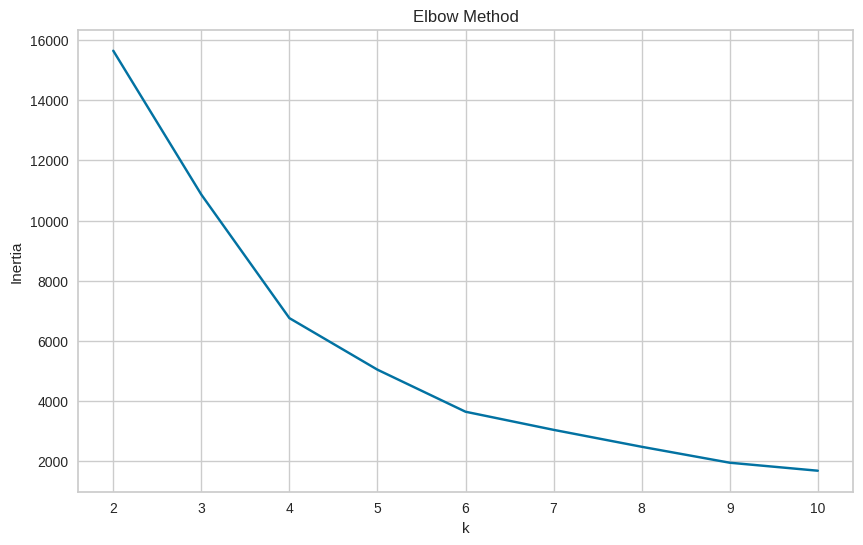

In [592]:
# Elbow Method
inertias = []
K = range(2, 11)

plt.figure(figsize=(10, 6))
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


For n_clusters = 2 The average silhouette_coefficient is : 0.6642339472840196
For n_clusters = 3 The average silhouette_coefficient is : 0.4914551654969636
For n_clusters = 4 The average silhouette_coefficient is : 0.4080458771730172
For n_clusters = 5 The average silhouette_coefficient is : 0.3595799232699986
For n_clusters = 6 The average silhouette_coefficient is : 0.39575314536609474
For n_clusters = 7 The average silhouette_coefficient is : 0.4061227339985969


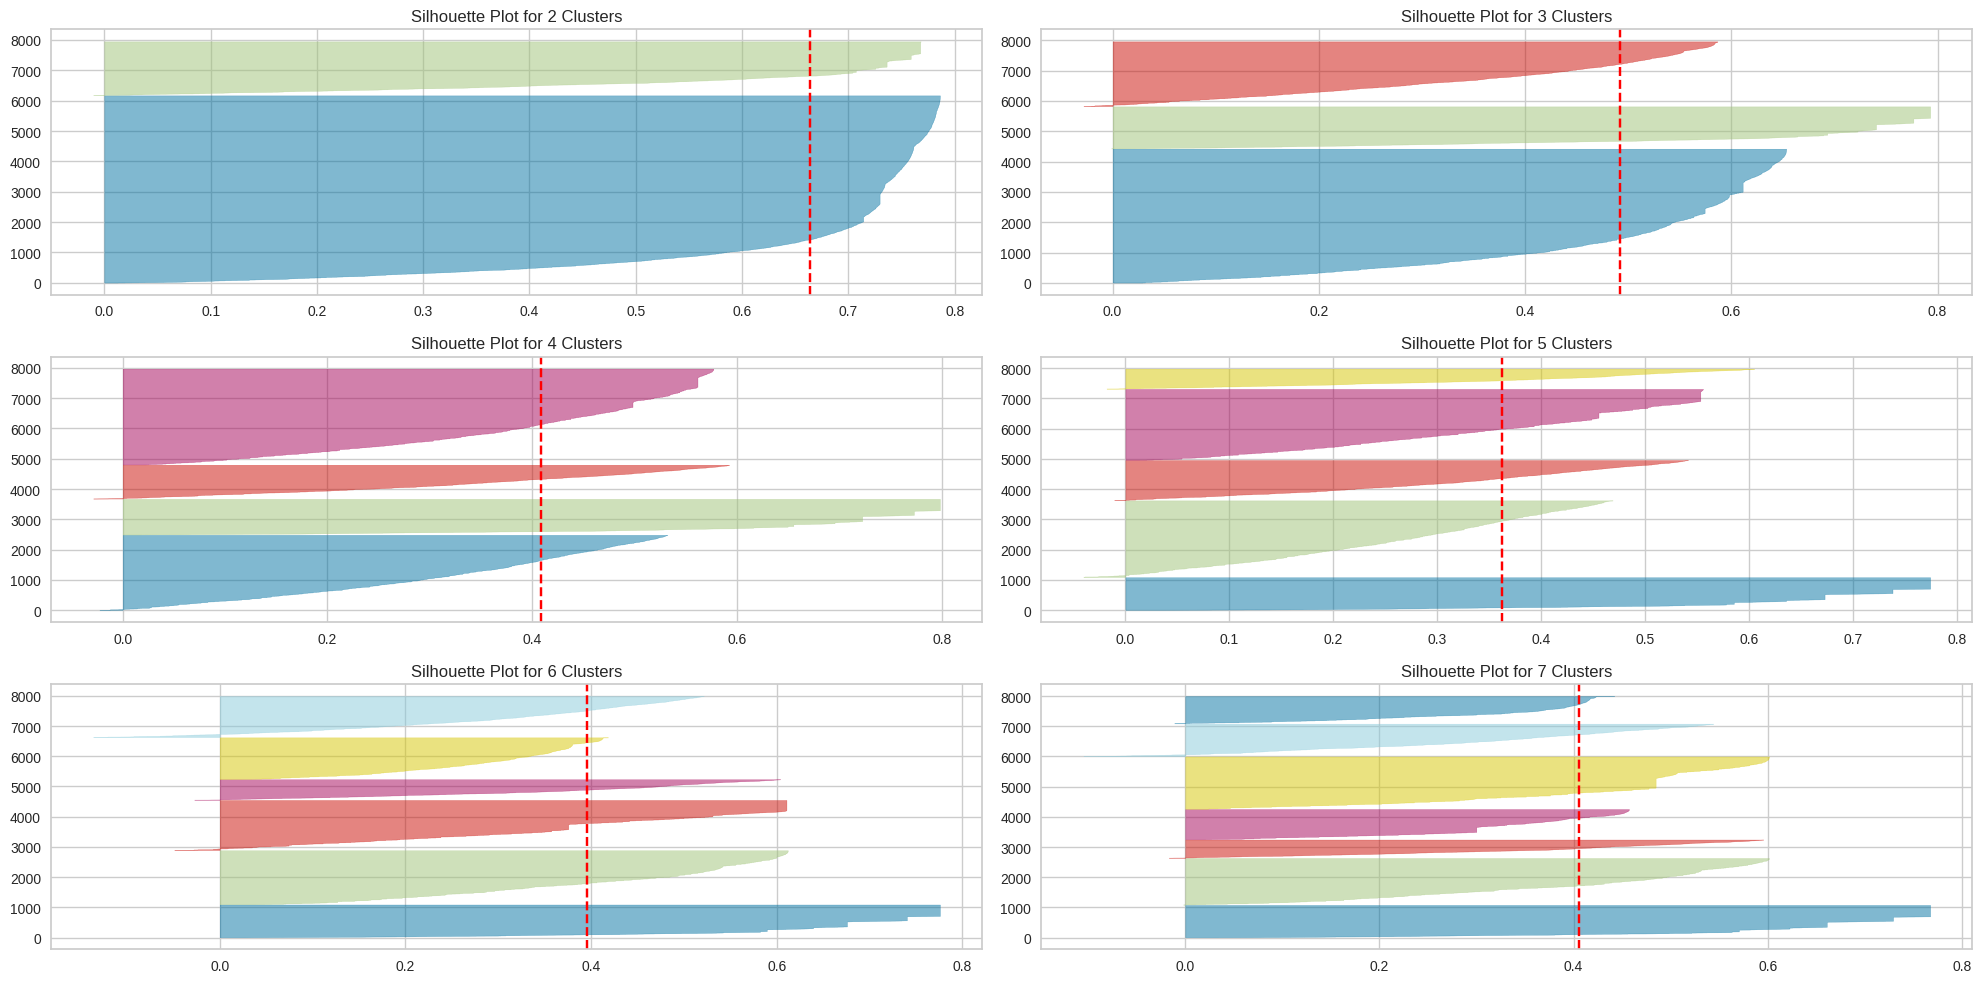

In [593]:
# Detailed Silhouette Analysis
num_of_cluster = [2, 3, 4, 5, 6, 7]
fig, ax = plt.subplots(3, 2, figsize=(20,10))
for k in num_of_cluster:
    clusterer = KMeans(n_clusters = k, n_init=10)

    q, mod = divmod(k, 2)
    visualizer = SilhouetteVisualizer(clusterer, colors = 'yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(X)
    visualizer.set_title(f'Silhouette Plot for {k} Clusters')

    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        k,
        "The average silhouette_coefficient is :",
        silhouette_avg,
    )
plt.tight_layout()
plt.show()

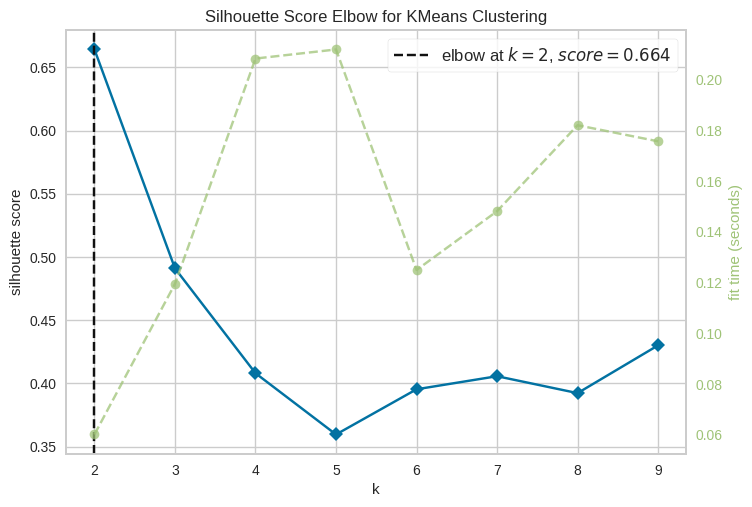

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [594]:
modeltes = KMeans(n_init = 10)
visualizer = KElbowVisualizer(modeltes, k=(2,10),metric='silhouette', timings= True)
visualizer.fit(X)
visualizer.show()

In [595]:
# Choosing the number of clusters based on silhouette analysis
n_clusters = 2

# Fit KMeans model
cluster_model = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
cluster_pred = cluster_model.fit_predict(X_scaled)


In [596]:
cluster_pred = cluster_model.fit_predict(X_scaled)

# Add cluster labels to the data
data_with_clusters = pd.DataFrame(X_scaled, columns=features)
data_with_clusters['Cluster'] = cluster_pred

print("Cluster Assignments")
print(data_with_clusters['Cluster'].value_counts())

Cluster Assignments
Cluster
0    5102
1    2832
Name: count, dtype: int64


<ipython-input-598-0b26ea29060d>:6: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

<ipython-input-598-0b26ea29060d>:10: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



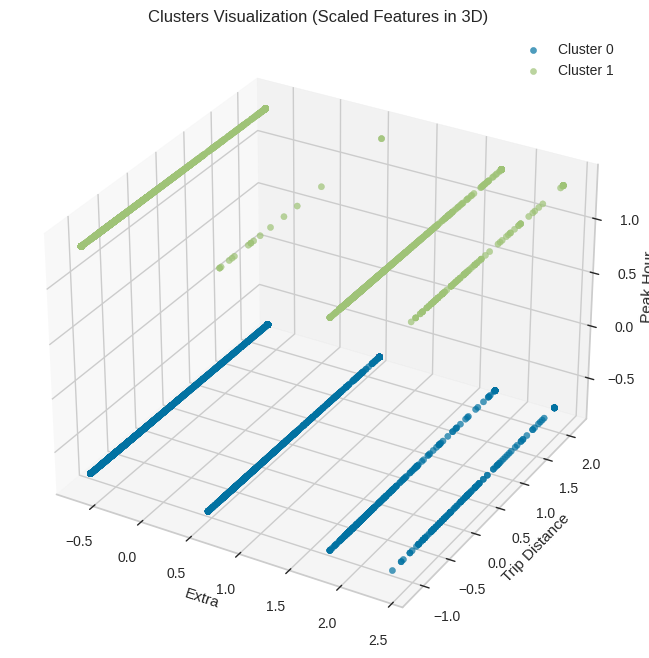

In [598]:
# 3D Scatter Plot with Matplotlib
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define a colormap
cmap = plt.cm.get_cmap('viridis', n_clusters)

for cluster_id in range(n_clusters):
    cluster_data = data_with_clusters[data_with_clusters['Cluster'] == cluster_id]
    ax.scatter(cluster_data['extra'], cluster_data['trip_distance'], cluster_data['peak_hour'],
                label=f'Cluster {cluster_id}', alpha=0.7, cmap=cmap)

ax.set_title('Clusters Visualization (Scaled Features in 3D)')
ax.set_xlabel('Extra')
ax.set_ylabel('Trip Distance')
ax.set_zlabel('Peak Hour')
ax.legend()
plt.show()


In [ ]:
# import plotly.express as px
# # Interactive 3D Plot with Plotly
# fig = px.scatter_3d(data_with_clusters, x='extra', y='mta_tax', z='peak_hour',
#                     color='Cluster', title='Clusters Visualization (Scaled Features in 3D)')
# fig.show()

# # 2D PCA Projection
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)

# data_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
# data_pca['Cluster'] = cluster_pred

# plt.figure(figsize=(8, 6))
# sns.scatterplot(data=data_pca, x='PC1', y='PC2', hue='Cluster', palette='viridis')
# plt.title('Clusters Visualization (PCA Projection)')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend(title='Cluster')
# plt.show()